In [106]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
typ= {"marketing", "sales","finanse","inzynieria","hr"}
doswiadczenie = {"doswiadczenie_staz-junior", "doswiadczenie_specjalista-mid", "doswiadczenie_starszy-specjalista-senior", "doswiadczenie_manager-c-level"}

In [263]:
def price_range_to_integers(price):
    return int(price.replace(" ",""))

dictionary = {}
dictionary2 = {}

for typPracy in typ:
    key = typPracy
    for dosw in doswiadczenie:
        page = requests.get(("https://rocketjobs.pl/wszystkie-lokalizacje/{}/{}/widelki_tak").format(typPracy,dosw))
        soup = BeautifulSoup(page.content, 'html5lib')
        offers = soup.find_all(class_='MuiBox-root css-6vg4fr')

        key2 = dosw

        job_offers = []

        for offer in offers:
            job_name = offer.find('h2', class_='css-g9dzcj').get_text()
            price_range = re.findall(r'\d+\s\d+', offer.find(class_='css-lz8wxo').get_text())
            price_low = price_range_to_integers(price_range[0])

            try:
                price_up = price_range_to_integers(price_range[1])
            except IndexError:
                price_up =  price_range_to_integers(price_range[0])

            job_offers.append([price_low,price_up])
        print(pd.DataFrame(job_offers)[0].mean(),pd.DataFrame(job_offers)[1].mean())
        value2 = [pd.DataFrame(job_offers)[0].mean(),pd.DataFrame(job_offers)[1].mean()]
        dictionary2[key2] = value2

    dictionary[key] = dictionary2

10800.0 15800.0
7250.0 9183.333333333334
9200.0 11066.666666666666
5133.333333333333 6566.666666666667
5485.714285714285 6742.857142857143
7141.379310344828 11186.206896551725
12000.0 17000.0
4700.0 7500.0
8682.432432432432 13129.72972972973
6347.32 9671.8
13563.157894736842 18321.052631578947
3820.3333333333335 5164.0
8935.29411764706 12094.117647058823
6861.111111111111 10169.5
16000.0 18000.0
4036.9565217391305 5665.217391304348
9197.741935483871 13763.225806451614
6288.41 10259.61
9050.0 15850.0
3979.310344827586 6093.103448275862


In [266]:
for job in dictionary.keys():
    print(dictionary[job])

{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junior': [3979.310344827586, 6093.103448275862]}
{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junior': [3979.310344827586, 6093.103448275862]}
{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junior': [3979.310344827586, 6093.103448275862]}
{'doswiadczenie_starszy-specjalista-senior': [9197.741935483871, 13763.225806451614], 'doswiadczenie_specjalista-mid': [6288.41, 10259.61], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_staz-junio

In [200]:
marketingDict = {}

for item in dictionary.keys():
    if item.split("/")[0] == "finanse":
        key= item.split("/")[1]
        value= dictionary[item]
        marketingDict[key] = value

for key in marketingDict.keys():
    print(marketingDict[key])

[10800.0, 15800.0]
[7250.0, 9183.333333333334]
[9200.0, 11066.666666666666]
[5133.333333333333, 6566.666666666667]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['doswiadczenie_starszy-specjalista-senior', 'doswiadczenie_specjalista-mid', 'doswiadczenie_manager-c-level', 'doswiadczenie_staz-junior']


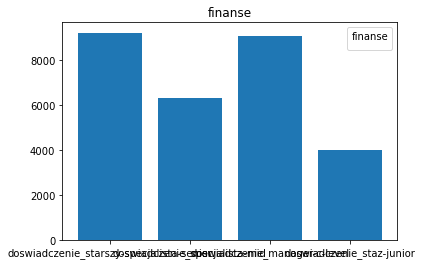

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['doswiadczenie_starszy-specjalista-senior', 'doswiadczenie_specjalista-mid', 'doswiadczenie_manager-c-level', 'doswiadczenie_staz-junior']


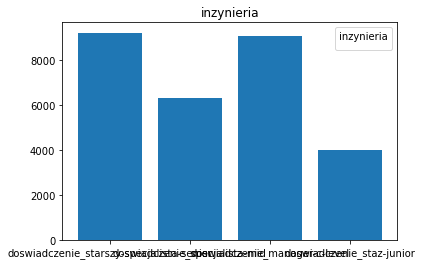

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['doswiadczenie_starszy-specjalista-senior', 'doswiadczenie_specjalista-mid', 'doswiadczenie_manager-c-level', 'doswiadczenie_staz-junior']


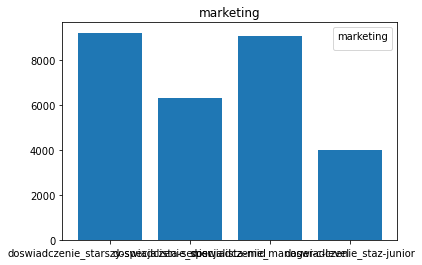

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['doswiadczenie_starszy-specjalista-senior', 'doswiadczenie_specjalista-mid', 'doswiadczenie_manager-c-level', 'doswiadczenie_staz-junior']


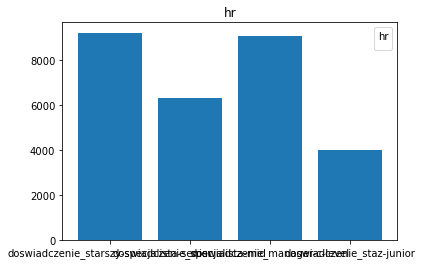

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['doswiadczenie_starszy-specjalista-senior', 'doswiadczenie_specjalista-mid', 'doswiadczenie_manager-c-level', 'doswiadczenie_staz-junior']


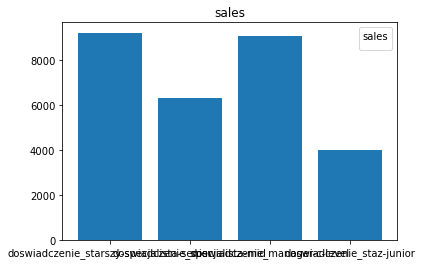

In [307]:

for jobName in dictionary.keys():
    fig, ax = plt.subplots()

    tempDict = dictionary[jobName]
    fruits = []
    counts = []
    for exp in tempDict.keys():
        fruits.append(exp)
        counts.append(tempDict[exp][0])
    print(fruits)

    ax.bar(fruits, counts)

    ax.set_title(jobName)
    ax.legend(title=jobName)

    plt.show()